B0829027 鄭星逸 HW5


# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 13s 33ms/step - loss: 0.6281 - accuracy: 0.8091 - val_loss: 0.3119 - val_accuracy: 0.9020
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2462 - accuracy: 0.9245 - val_loss: 0.1888 - val_accuracy: 0.9421
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1630 - accuracy: 0.9500 - val_loss: 0.1505 - val_accuracy: 0.9542
Epoch 4/10
375/375 [==============================] - 7s 17ms/step - loss: 0.1141 - accuracy: 0.9648 - val_loss: 0.1417 - val_accuracy: 0.9567
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0844 - accuracy: 0.9732 - val_loss: 0.1444 - val_accuracy: 0.9599
Epoch 6/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0631 - accuracy: 0.9795 - val_loss: 0.1585 - val_accuracy: 0.9574
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.1250 - val_accuracy: 0.967

**Plotting a validation accuracy comparison**

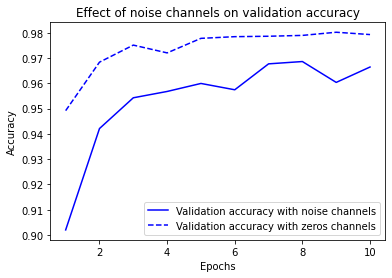

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3165 - accuracy: 0.1029 - val_loss: 2.3077 - val_accuracy: 0.1034
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3005 - accuracy: 0.1156 - val_loss: 2.3113 - val_accuracy: 0.1054
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2903 - accuracy: 0.1287 - val_loss: 2.3201 - val_accuracy: 0.1064
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2778 - accuracy: 0.1394 - val_loss: 2.3323 - val_accuracy: 0.0999
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2609 - accuracy: 0.1532 - val_loss: 2.3337 - val_accuracy: 0.1041
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2397 - accuracy: 0.1656 - val_loss: 2.3516 - val_accuracy: 0.0976
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2161 - accuracy: 0.1816 - val_loss: 2.3660 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 876.5939 - accuracy: 0.4045 - val_loss: 3.0269 - val_accuracy: 0.3131
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 4.1575 - accuracy: 0.2710 - val_loss: 6.1373 - val_accuracy: 0.3306
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 2.7634 - accuracy: 0.2788 - val_loss: 2.2533 - val_accuracy: 0.2812
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 3.2047 - accuracy: 0.2533 - val_loss: 2.2052 - val_accuracy: 0.2347
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 2.7694 - accuracy: 0.2517 - val_loss: 2.3841 - val_accuracy: 0.2561
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 2.6568 - accuracy: 0.2592 - val_loss: 2.6233 - val_accuracy: 0.2817
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.4169 - accuracy: 0.2633 - val_loss: 5.1663 - val_accuracy: 0.33

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3650 - accuracy: 0.9121 - val_loss: 0.1791 - val_accuracy: 0.9497
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1379 - accuracy: 0.9642 - val_loss: 0.2093 - val_accuracy: 0.9536
Epoch 3/10
375/375 [==============================] - 9s 25ms/step - loss: 0.1186 - accuracy: 0.9727 - val_loss: 0.1858 - val_accuracy: 0.9633
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1008 - accuracy: 0.9774 - val_loss: 0.2190 - val_accuracy: 0.9653
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0899 - accuracy: 0.9813 - val_loss: 0.2212 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0839 - accuracy: 0.9848 - val_loss: 0.2205 - val_accuracy: 0.9729
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0806 - accuracy: 0.9860 - val_loss: 0.2968 - val_accuracy: 0.9693

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6750 - accuracy: 0.8344 - val_loss: 0.3565 - val_accuracy: 0.9048
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.9035 - val_loss: 0.3064 - val_accuracy: 0.9157
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.9121 - val_loss: 0.2888 - val_accuracy: 0.9212
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.9171 - val_loss: 0.2809 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2892 - accuracy: 0.9196 - val_loss: 0.2753 - val_accuracy: 0.9244
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9215 - val_loss: 0.2714 - val_accuracy: 0.9263
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.9234 - val_loss: 0.2706 - val_accuracy: 0.9246
Epoch 

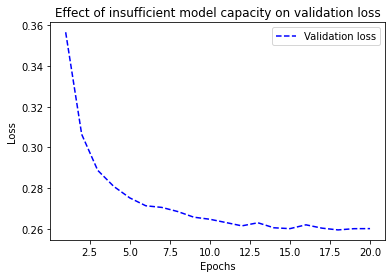

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3512 - accuracy: 0.8998 - val_loss: 0.1770 - val_accuracy: 0.9482
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1597 - accuracy: 0.9524 - val_loss: 0.1411 - val_accuracy: 0.9581
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1138 - accuracy: 0.9657 - val_loss: 0.1141 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0891 - accuracy: 0.9727 - val_loss: 0.1035 - val_accuracy: 0.9682
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0717 - accuracy: 0.9784 - val_loss: 0.1040 - val_accuracy: 0.9695
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.1106 - val_accuracy: 0.9681
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.1021 - val_accuracy: 0.9722
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5559 - accuracy: 0.7806 - val_loss: 0.4269 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3443 - accuracy: 0.8977 - val_loss: 0.3223 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2510 - accuracy: 0.9193 - val_loss: 0.3125 - val_accuracy: 0.8734
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1973 - accuracy: 0.9363 - val_loss: 0.2775 - val_accuracy: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1614 - accuracy: 0.9491 - val_loss: 0.3026 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1336 - accuracy: 0.9569 - val_loss: 0.2874 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1119 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6270 - accuracy: 0.7655 - val_loss: 0.5641 - val_accuracy: 0.8275
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5058 - accuracy: 0.8655 - val_loss: 0.4721 - val_accuracy: 0.8489
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4139 - accuracy: 0.8855 - val_loss: 0.4004 - val_accuracy: 0.8711
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3434 - accuracy: 0.8993 - val_loss: 0.3513 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2906 - accuracy: 0.9109 - val_loss: 0.3186 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2506 - accuracy: 0.9217 - val_loss: 0.2991 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2193 - accuracy: 0.9311 - val_loss: 0.2842 - val_accuracy: 0.8900
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 317ms/step - loss: 0.5372 - accuracy: 0.7546 - val_loss: 0.3231 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 9s 301ms/step - loss: 0.2571 - accuracy: 0.8987 - val_loss: 0.2744 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 9s 305ms/step - loss: 0.1426 - accuracy: 0.9449 - val_loss: 0.3240 - val_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 9s 303ms/step - loss: 0.0711 - accuracy: 0.9767 - val_loss: 0.4786 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 9s 300ms/step - loss: 0.0988 - accuracy: 0.9779 - val_loss: 0.3448 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 9s 300ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.5101 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 9s 299ms/step - loss: 7.2425e-04 - accuracy: 0.9999 - val_loss: 0.6237 - val_accuracy: 0.8860
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6059 - accuracy: 0.7653 - val_loss: 0.4688 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4007 - accuracy: 0.8984 - val_loss: 0.4011 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3307 - accuracy: 0.9158 - val_loss: 0.3657 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2970 - accuracy: 0.9272 - val_loss: 0.3873 - val_accuracy: 0.8728
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2744 - accuracy: 0.9370 - val_loss: 0.3554 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2609 - accuracy: 0.9410 - val_loss: 0.3569 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2558 - accuracy: 0.9411 - val_loss: 0.3607 - val_accuracy: 0.8857
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.6603 - accuracy: 0.5908 - val_loss: 0.5803 - val_accuracy: 0.7586
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5700 - accuracy: 0.7107 - val_loss: 0.4491 - val_accuracy: 0.8581
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4872 - accuracy: 0.7807 - val_loss: 0.3882 - val_accuracy: 0.8746
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4167 - accuracy: 0.8241 - val_loss: 0.3327 - val_accuracy: 0.8789
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3646 - accuracy: 0.8597 - val_loss: 0.3022 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3208 - accuracy: 0.8829 - val_loss: 0.2791 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2758 - accuracy: 0.9013 - val_loss: 0.2885 - val_accuracy: 0.8858
Epoch 8/20
30

## Summary